In [1]:
import geopandas as gpd
import pyarrow
import pandas as pd
import os

In [2]:

def write_file(filename, info):
  text_file = open(filename, "w")
  text_file.write(info)
  text_file.close()

In [58]:
target_2631 = pd.read_parquet('data/GPS.nosync/filter/Sonoma_2631_new', engine='pyarrow')

In [4]:
streets = gpd.read_file('data/GPS.nosync/Streets/Streets.shp')

<AxesSubplot:>

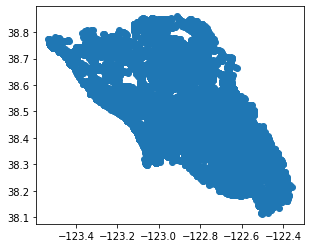

In [6]:
streets.boundary.plot()

In [46]:
_streets = gpd.read_file('data/GPS.nosync/_street_nodes_dual.shp')

<AxesSubplot:>

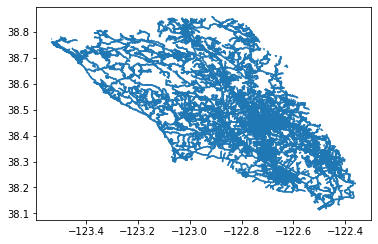

In [47]:
_streets.plot()

In [51]:
_streets_ = gpd.read_file('data/GPS.nosync/street_nodes_dual.shp')

<AxesSubplot:>

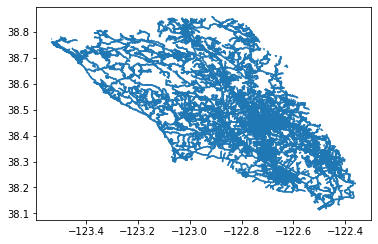

In [52]:
_streets.plot()

In [13]:
def show_points(filename, dataType):
  if os.path.isfile(filename):
    #open text file in read mode
    text_file = open(filename, "r")

    #read whole file to a string
    points = text_file.read()

    #close file
    text_file.close()
    data = {'col1': ['name1'], 'wkt': points}
    df = pd.DataFrame(data)
    gs = gpd.GeoSeries.from_wkt(df['wkt'])
    gdf = gpd.GeoDataFrame(df, geometry=gs, crs="EPSG:4326")
    #print(type(gs))
    if dataType == 2:
      tmp = gdf.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
      x_ = []
      y_ = []
      for data in tmp[0]:
        x_.append(data[0])
        y_.append(data[1])
      gdf = gpd.GeoDataFrame(
        pd.DataFrame(), geometry=gpd.points_from_xy(x=x_, y=y_))
    return gdf
  else:
    print("NO SUCH FILE")

def show_points_from_df(df, index, dataType):

    #read whole file to a string
    points = df.loc[index]["res"]
    #print(points)
    data = {'col1': ['name1'], 'wkt': points}
    df1 = pd.DataFrame(data)
    gs = gpd.GeoSeries.from_wkt(df1['wkt'])
    gdf = gpd.GeoDataFrame(df1, geometry=gs, crs="EPSG:4326")
    #print(type(gs))
    if dataType == 2:
      tmp = gdf.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
      x_ = []
      y_ = []
      for data in tmp[0]:
        x_.append(data[0])
        y_.append(data[1])
      gdf = gpd.GeoDataFrame(
        pd.DataFrame(), geometry=gpd.points_from_xy(x=x_, y=y_))
    return gdf


In [112]:
x_ = []
x_.append(1)
x_.append(2)
x_.append(3)
x_.append(4)
df = pd.DataFrame()
len(x_)
k = gpd.points_from_xy(x=x_, y=x_)
gdf = gpd.GeoDataFrame(
        df, geometry=k)
gdf

,geometry
0,POINT (1.00000 1.00000)
1,POINT (2.00000 2.00000)
2,POINT (3.00000 3.00000)
3,POINT (4.00000 4.00000)


In [130]:
file_path1 = "data/GPS.nosync/output/sub-result-23/23-m_wkt.txt"
gdf_wkt = show_points(file_path1,1)
file_path2 = "data/GPS.nosync/output/sub-result-23/23-e_wkt.txt"
gdf_ekt = show_points(file_path2,1)
file_path3 = "data/GPS.nosync/points/23-points.txt"
gdf_points = show_points(file_path3,2)

In [24]:
gdf_wkt = []
gdf_ekt = []
gdf_points = []
#index_list = [1332,1396,1472]
index_list = [370, 630, 831, 1000, 1269,1396]
df = pd.read_csv('data/GPS.nosync/Sonoma-2631-new-points/out2.csv')
#index_list = [4, 23, 187, 370, 497, 705, 831, 1000, 1061, 1536, 1592]
for i in index_list:
  print(i)
  line_base = "data/GPS.nosync/output/sub-result-"
  points_base = "data/GPS.nosync/points/"
  file_path1 = line_base + str(i) + '/' + str(i) + "-m_wkt.txt"
  gdf_wkt.append(show_points(file_path1,1))
  # file_path2 = line_base + str(i) + '/' + str(i) + "-e_wkt.txt"
  # gdf_ekt.append(show_points(file_path2,1))
  # file_path3 = points_base + str(i) + "-points.txt"
  # gdf_points.append(show_points(file_path3 ,2))
  gdf_points.append(show_points_from_df(df, i ,2))


370
630
831
1000
1269
1396


<AxesSubplot:>

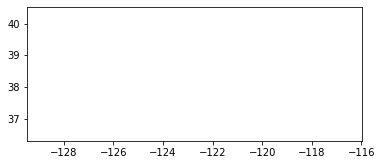

In [21]:
gdf_wkt[5]['geometry'].plot()

In [ ]:
index = 9
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(32, 32))
streets.plot(ax=ax, color='black', LineWidth = 2)
#gdf_ekt.plot(ax=ax, color='green',LineWidth = 2)
gdf_points[index].plot(ax=ax, color='blue', LineWidth = 1)
gdf_wkt[index].plot(ax=ax, color='red',LineWidth = 1)

<AxesSubplot:>

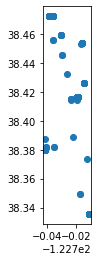

In [23]:
gdf_points[0].plot() 

In [25]:
import folium
from folium import plugins
for index in range(0,6):
    map2 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 16, min_zoom=8)

    for coord in gdf_points[index]['geometry']:
        folium.Marker( location=[ coord.y, coord.x ]).add_to( map2 )
    #plugins.HeatMap(heat_data).add_to(map)
    folium.Choropleth(
        gdf_wkt[index],
        line_weight=3,
        line_color='blue'
    ).add_to(map2)

    map2.save(str(index) + "tmp.html")
#map2[0]

In [ ]:
map3 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data3,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map3)
#plugins.HeatMap(heat_data).add_to(map)
map3


In [ ]:
map4 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data4,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map4)
#plugins.HeatMap(heat_data).add_to(map)
map4

In [ ]:
map5 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data3,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map5)
#plugins.HeatMap(heat_data).add_to(map)
map5

In [ ]:
map6 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data6,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map6)
#plugins.HeatMap(heat_data).add_to(map)
map6

In [ ]:
map7 = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12,max_zoom = 14, min_zoom=10)

plugins.HeatMap(heat_data7,min_opacity=0.4,
                   radius=21, blur=12, 
                   max_zoom=4, min_zoom=8).add_to(map7)
#plugins.HeatMap(heat_data).add_to(map)
map7

In [ ]:
map2.save("26-06-26-12.html")
map3.save("26-12-26-22.html")
map4.save("26-22-27-06.html")
map5.save("27-06-27-12.html")
map6.save("27-12-27-22.html")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(64, 64))
streets.plot(ax=ax, color='black', LineWidth = 2)
gdf2.plot(ax=ax, color='green',LineWidth = 2)
#gdf.plot(ax=ax, color='blue', LineWidth = 1)
gdf1.plot(ax=ax, color='red',LineWidth = 1)

In [ ]:
# parts = streets[1:10000]
# parts['points'] = parts.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
# len(parts)
gdf2['points'] = gdf1.apply(lambda x: [y for y in x['geometry'].coords], axis=1)
gdf1.head
gdf1

In [ ]:
import folium
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)

In [ ]:
from folium import plugins

map = folium.Map(location=[38.447135, -122.76633], tiles='OpenStreetMap',zoom_start=12)

#heat_data = [gdf2.points[0],gdf2.points[1]]
#heat_data[1] = 
heat_data = [[point[1], point[0]] for point in gdf2['points'][0] ]
# for point in gdf2['points'][1]:
#   heat_data.append([point[1],point[0]])
for points in gdf2['points']:
  for p in points:
    heat_data.append([p[1],p[0]])
heat_data
plugins.HeatMap(heat_data,min_opacity=0.5,
                   radius=4, blur=4, 
                   max_zoom=1).add_to(map)
map


In [ ]:
heat_data

In [ ]:
map.save("index-1-14-13-13.html")

In [ ]:
plugins.HeatMap(heat_data).add_to(map)
map